In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sys import path
import os
from os.path import dirname as dir
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from utils import plot_confusion_matrix
from IPython.display import Image
if __name__ == "__main__" and __package__ is None:
    path.append(dir(os.path.join("..", "ExKMC")))
    __package__ = "ExKMC"
    from ExKMC.CTree import Tree
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [2]:
categories = ['sci.space', 'rec.sport.baseball', 'soc.religion.christian', 'comp.sys.mac.hardware']
dataset = datasets.fetch_20newsgroups(subset='all', categories=categories, 
                                      remove=('headers', 'footers', 'quotes'),
                                      shuffle=True, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', 
                             token_pattern=r'\b[^\d\W]+\b', min_df=.01, max_df=.1)
X = vectorizer.fit_transform(dataset.data).toarray()
k = len(categories)

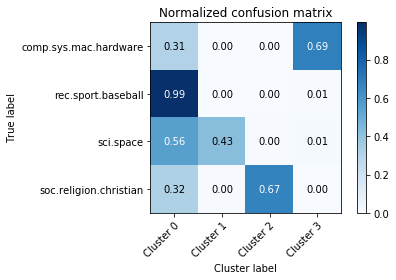

In [3]:
kmeans = KMeans(k)
kmeans.fit(X)
p = kmeans.predict(X)

class_names = np.array(dataset["target_names"])
plot_confusion_matrix(dataset.target, p, class_names, normalize=True)

plt.show()

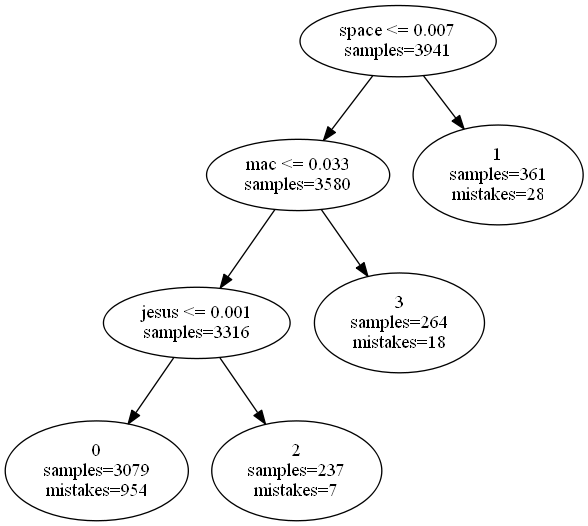

In [4]:
tree = Tree(k)
tree.fit(X, kmeans)

feature_names = [k for k, v in sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])]
tree.plot(filename="test", feature_names=feature_names)
Image(filename='test.gv.png')

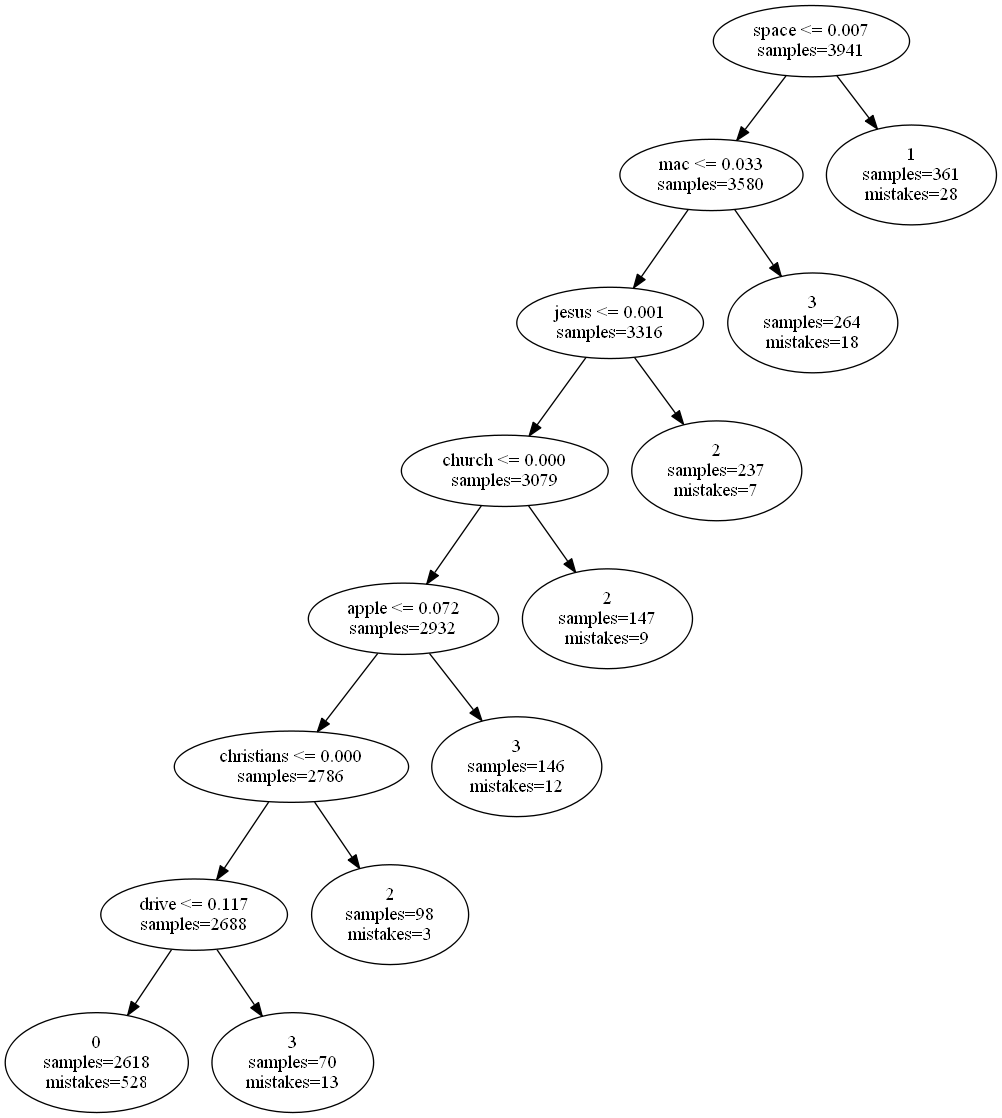

In [5]:
tree = Tree(k, max_leaves=8)
tree.fit(X, kmeans)

feature_names = [k for k, v in sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])]
tree.plot(filename="test", feature_names=feature_names)
Image(filename='test.gv.png')